# Keerthi Sri Geddada

In [1]:
!pip install vaderSentiment

In [2]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# Reading News Data

In [3]:
df1 = pd.read_csv('india-news-headlines (1).csv',parse_dates=True)
df1

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...


In [4]:
df1['publish_date'] = pd.to_datetime(df1['publish_date'], format='%Y%m%d') 
df1

,publish_date,headline_category,headline_text
0,2001-01-01,sports.wwe,win over cena satisfying but defeating underta...
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,For bigwigs; it is destination Goa
...,...,...,...
3297167,2020-06-30,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,2020-06-30,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,2020-06-30,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,2020-06-30,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...


# Reading Sock Data

In [5]:
df2 = pd.read_csv('REGN.csv')
df2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,378.000000,379.000000,369.239990,373.350006,373.350006,512400
1,2020-01-03,368.209991,372.350006,367.049988,369.160004,369.160004,500800
2,2020-01-06,368.230011,372.140015,364.500000,371.739990,371.739990,690800
3,2020-01-07,371.559998,373.829987,368.019989,373.130005,373.130005,736400
4,2020-01-08,373.179993,384.850006,370.709991,382.420013,382.420013,743100
...,...,...,...,...,...,...,...
186,2020-09-28,572.830017,574.619995,559.059998,571.919983,571.919983,637000
187,2020-09-29,573.200012,576.000000,567.919983,573.609985,573.609985,454100
188,2020-09-30,589.770020,589.770020,554.000000,559.780029,559.780029,2157900
189,2020-10-01,562.500000,568.380005,552.270020,568.140015,568.140015,1092600


# Shapes and Info

In [6]:
df1.shape

(3297172, 3)

In [7]:
df1.dtypes

publish_date         datetime64[ns]
headline_category            object
headline_text                object
dtype: object

In [8]:
df1.isna().any()

publish_date         False
headline_category    False
headline_text        False
dtype: bool

In [9]:
df2.shape

(191, 7)

In [10]:
df2.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [11]:
df2.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

# Sentiment analysis

In [12]:
df1=df1[3206784:]
df1

,publish_date,headline_category,headline_text
3206784,2020-01-02,astrology.horoscope,Horoscope Today; 02 January 2020: Read predict...
3206785,2020-01-02,life-style.fashion.buzz,5 fashion resolutions to make in 2020
3206786,2020-01-02,entertainment.hindi.bollywood,'Chhapaak' to 'Radhe' and 'Brahmastra': 20 fil...
3206787,2020-01-02,life-style.health-fitness.fitness,New Year; New Workout: Day 2 of 7-day weight l...
3206788,2020-01-02,life-style.health-fitness.health-news,Benefits of core health in everyday life
...,...,...,...
3297167,2020-06-30,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,2020-06-30,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,2020-06-30,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,2020-06-30,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...


In [13]:
df1.rename(columns = {'publish_date':'Date'}, inplace = True) 
df1

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Date,headline_category,headline_text
3206784,2020-01-02,astrology.horoscope,Horoscope Today; 02 January 2020: Read predict...
3206785,2020-01-02,life-style.fashion.buzz,5 fashion resolutions to make in 2020
3206786,2020-01-02,entertainment.hindi.bollywood,'Chhapaak' to 'Radhe' and 'Brahmastra': 20 fil...
3206787,2020-01-02,life-style.health-fitness.fitness,New Year; New Workout: Day 2 of 7-day weight l...
3206788,2020-01-02,life-style.health-fitness.health-news,Benefits of core health in everyday life
...,...,...,...
3297167,2020-06-30,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,2020-06-30,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,2020-06-30,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,2020-06-30,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...


In [14]:
df1=df1.groupby(['Date'], as_index = False).agg({'headline_text': ','.join})
print(df1)

          Date                                      headline_text
0   2020-01-02  Horoscope Today; 02 January 2020: Read predict...
1   2020-01-03  Bank Holidays in 2020,Mazya Navryachi Bayko up...
2   2020-01-04  Mamta Mohandas plays a nurse in Lalbagh,Tolly ...
3   2020-01-05  Homing in on 2020,Beauty in blue,Live it up in...
4   2020-01-06  With captive pics and posts; city shining on s...
..         ...                                                ...
176 2020-06-26  Containment zone residents slam high prices ch...
177 2020-06-27  like me i wont let you have a toxic relationsh...
178 2020-06-28  Atanu Ghosh plans to rewrite old scripts to ma...
179 2020-06-29  6 hot and stylish bikini looks of Katrina Kaif...
180 2020-06-30  Detective Byomkesh Bakshy!,Edge of Tomorrow,Fi...

[181 rows x 2 columns]


In [15]:
df2=df2[0:125]
df2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,378.000000,379.000000,369.239990,373.350006,373.350006,512400
1,2020-01-03,368.209991,372.350006,367.049988,369.160004,369.160004,500800
2,2020-01-06,368.230011,372.140015,364.500000,371.739990,371.739990,690800
3,2020-01-07,371.559998,373.829987,368.019989,373.130005,373.130005,736400
4,2020-01-08,373.179993,384.850006,370.709991,382.420013,382.420013,743100
...,...,...,...,...,...,...,...
120,2020-06-24,630.000000,644.700012,599.000000,605.039978,605.039978,1459600
121,2020-06-25,604.669983,620.289978,602.510010,619.960022,619.960022,813900
122,2020-06-26,611.020020,616.349976,601.559998,611.359985,611.359985,1817800
123,2020-06-29,609.369995,617.270020,605.770020,610.869995,610.869995,663200


In [16]:
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%m-%d') 
df2

<ipython-input-16-ee845aab3258>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%m-%d')


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,378.000000,379.000000,369.239990,373.350006,373.350006,512400
1,2020-01-03,368.209991,372.350006,367.049988,369.160004,369.160004,500800
2,2020-01-06,368.230011,372.140015,364.500000,371.739990,371.739990,690800
3,2020-01-07,371.559998,373.829987,368.019989,373.130005,373.130005,736400
4,2020-01-08,373.179993,384.850006,370.709991,382.420013,382.420013,743100
...,...,...,...,...,...,...,...
120,2020-06-24,630.000000,644.700012,599.000000,605.039978,605.039978,1459600
121,2020-06-25,604.669983,620.289978,602.510010,619.960022,619.960022,813900
122,2020-06-26,611.020020,616.349976,601.559998,611.359985,611.359985,1817800
123,2020-06-29,609.369995,617.270020,605.770020,610.869995,610.869995,663200


In [17]:
merge = df1.merge(df2, how='inner', on='Date', left_index = True)

In [18]:
merge

,Date,headline_text,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,Horoscope Today; 02 January 2020: Read predict...,378.000000,379.000000,369.239990,373.350006,373.350006,512400
1,2020-01-03,"Bank Holidays in 2020,Mazya Navryachi Bayko up...",368.209991,372.350006,367.049988,369.160004,369.160004,500800
2,2020-01-06,With captive pics and posts; city shining on s...,368.230011,372.140015,364.500000,371.739990,371.739990,690800
3,2020-01-07,"Pro-CAA campaign in Bettiah turns unruly,Holy ...",371.559998,373.829987,368.019989,373.130005,373.130005,736400
4,2020-01-08,"Seems like systematic assault; say students,Co...",373.179993,384.850006,370.709991,382.420013,382.420013,743100
...,...,...,...,...,...,...,...,...
120,2020-06-24,I never thought I had a voice until today: Vid...,630.000000,644.700012,599.000000,605.039978,605.039978,1459600
121,2020-06-25,Truck firms look for new export markets to sel...,604.669983,620.289978,602.510010,619.960022,619.960022,813900
122,2020-06-26,Containment zone residents slam high prices ch...,611.020020,616.349976,601.559998,611.359985,611.359985,1817800
123,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...,609.369995,617.270020,605.770020,610.869995,610.869995,663200


In [19]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity
 

In [20]:
merge['Subjectivity'] =merge['headline_text'].apply(getSubjectivity)
merge['Polarity'] =merge['headline_text'].apply(getPolarity)

In [23]:
def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

In [24]:
compound = []
neg = []
neu = []
pos = []
SIA = 0
for i in range(0, len(merge['headline_text'])):
    SIA = getSIA(merge['headline_text'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    neu.append(SIA['neu'])
    pos.append(SIA['pos'])

In [25]:
merge['Compound'] =compound
merge['Negative'] =neg
merge['Neutral'] =neu
merge['Positive'] = pos

In [26]:
merge.head()

,Date,headline_text,Open,High,Low,Close,Adj Close,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2020-01-02,Horoscope Today; 02 January 2020: Read predict...,378.000000,379.000000,369.239990,373.350006,373.350006,512400,0.419291,0.098673,-0.9996,0.118,0.804,0.077
1,2020-01-03,"Bank Holidays in 2020,Mazya Navryachi Bayko up...",368.209991,372.350006,367.049988,369.160004,369.160004,500800,0.396647,0.071664,-0.9945,0.099,0.811,0.090
2,2020-01-06,With captive pics and posts; city shining on s...,368.230011,372.140015,364.500000,371.739990,371.739990,690800,0.383687,0.023865,-0.9995,0.100,0.846,0.054
3,2020-01-07,"Pro-CAA campaign in Bettiah turns unruly,Holy ...",371.559998,373.829987,368.019989,373.130005,373.130005,736400,0.380315,0.039626,-1.0000,0.185,0.747,0.068
4,2020-01-08,"Seems like systematic assault; say students,Co...",373.179993,384.850006,370.709991,382.420013,382.420013,743100,0.405519,0.052791,-0.9998,0.128,0.808,0.063


In [27]:
keep_columns = [ 'Open',  'High', 'Low',    'Volume', 'Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive' ]
df = merge[keep_columns]
df

,Open,High,Low,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,378.000000,379.000000,369.239990,512400,0.419291,0.098673,-0.9996,0.118,0.804,0.077
1,368.209991,372.350006,367.049988,500800,0.396647,0.071664,-0.9945,0.099,0.811,0.090
2,368.230011,372.140015,364.500000,690800,0.383687,0.023865,-0.9995,0.100,0.846,0.054
3,371.559998,373.829987,368.019989,736400,0.380315,0.039626,-1.0000,0.185,0.747,0.068
4,373.179993,384.850006,370.709991,743100,0.405519,0.052791,-0.9998,0.128,0.808,0.063
...,...,...,...,...,...,...,...,...,...,...
120,630.000000,644.700012,599.000000,1459600,0.372516,0.097046,-0.9997,0.115,0.813,0.073
121,604.669983,620.289978,602.510010,813900,0.401447,0.023291,-0.9999,0.129,0.819,0.052
122,611.020020,616.349976,601.559998,1817800,0.381825,0.084044,-0.9999,0.147,0.768,0.085
123,609.369995,617.270020,605.770020,663200,0.379891,0.052443,-0.9997,0.120,0.804,0.077


In [28]:
df['label']=0
for i in range(0,len(df)):
    if df['Positive'][i]>=0.05:
        df['label'][i]=1
    else:
        df['label'][i]=0

<ipython-input-28-01bf93fa8d41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label']=0
<ipython-input-28-01bf93fa8d41>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][i]=1
C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input

In [29]:
df

,Open,High,Low,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,label
0,378.000000,379.000000,369.239990,512400,0.419291,0.098673,-0.9996,0.118,0.804,0.077,1
1,368.209991,372.350006,367.049988,500800,0.396647,0.071664,-0.9945,0.099,0.811,0.090,1
2,368.230011,372.140015,364.500000,690800,0.383687,0.023865,-0.9995,0.100,0.846,0.054,1
3,371.559998,373.829987,368.019989,736400,0.380315,0.039626,-1.0000,0.185,0.747,0.068,1
4,373.179993,384.850006,370.709991,743100,0.405519,0.052791,-0.9998,0.128,0.808,0.063,1
...,...,...,...,...,...,...,...,...,...,...,...
120,630.000000,644.700012,599.000000,1459600,0.372516,0.097046,-0.9997,0.115,0.813,0.073,1
121,604.669983,620.289978,602.510010,813900,0.401447,0.023291,-0.9999,0.129,0.819,0.052,1
122,611.020020,616.349976,601.559998,1817800,0.381825,0.084044,-0.9999,0.147,0.768,0.085,1
123,609.369995,617.270020,605.770020,663200,0.379891,0.052443,-0.9997,0.120,0.804,0.077,1


<AxesSubplot:xlabel='Volume'>

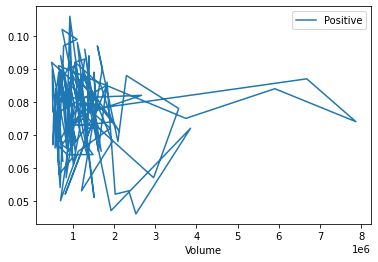

In [30]:
df.plot('Volume','Positive')

In [31]:
y=df['label']
x= df[['Open','High','Low','Volume','Subjectivity','Polarity','Compound','Negative','Neutral','Positive']]



# Spliting the Data

In [32]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)


# Fitting the data

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis().fit(x_train, y_train)

In [34]:
predictions = model.predict(x_test)
predictions

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1], dtype=int64)

# Accuracy

In [35]:
from sklearn.metrics import classification_report
print( classification_report(y_test, predictions) )

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.96      0.92      0.94        24

    accuracy                           0.88        25
   macro avg       0.48      0.46      0.47        25
weighted avg       0.92      0.88      0.90        25



# Numerical analysis of historical stock prices

In [36]:
df2 = pd.read_csv('REGN.csv')
df2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,378.000000,379.000000,369.239990,373.350006,373.350006,512400
1,2020-01-03,368.209991,372.350006,367.049988,369.160004,369.160004,500800
2,2020-01-06,368.230011,372.140015,364.500000,371.739990,371.739990,690800
3,2020-01-07,371.559998,373.829987,368.019989,373.130005,373.130005,736400
4,2020-01-08,373.179993,384.850006,370.709991,382.420013,382.420013,743100
...,...,...,...,...,...,...,...
186,2020-09-28,572.830017,574.619995,559.059998,571.919983,571.919983,637000
187,2020-09-29,573.200012,576.000000,567.919983,573.609985,573.609985,454100
188,2020-09-30,589.770020,589.770020,554.000000,559.780029,559.780029,2157900
189,2020-10-01,562.500000,568.380005,552.270020,568.140015,568.140015,1092600


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

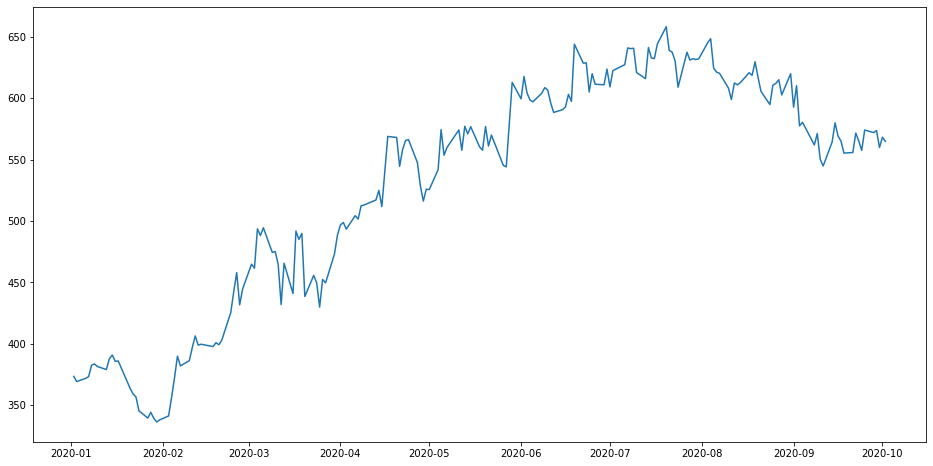

In [38]:
df2['Date'] = pd.to_datetime(df2.Date,format='%Y-%m-%d')
df2.index = df2['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df2['Close'], label='Close Price history')


In [39]:
df2

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2020-01-02,2020-01-02,378.000000,379.000000,369.239990,373.350006,373.350006,512400
2020-01-03,2020-01-03,368.209991,372.350006,367.049988,369.160004,369.160004,500800
2020-01-06,2020-01-06,368.230011,372.140015,364.500000,371.739990,371.739990,690800
2020-01-07,2020-01-07,371.559998,373.829987,368.019989,373.130005,373.130005,736400
2020-01-08,2020-01-08,373.179993,384.850006,370.709991,382.420013,382.420013,743100
...,...,...,...,...,...,...,...
2020-09-28,2020-09-28,572.830017,574.619995,559.059998,571.919983,571.919983,637000
2020-09-29,2020-09-29,573.200012,576.000000,567.919983,573.609985,573.609985,454100
2020-09-30,2020-09-30,589.770020,589.770020,554.000000,559.780029,559.780029,2157900


# Moving Average

In [40]:


data = df2.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df2)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

# NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will destroy the time component. So here we have set the last year’s data into validation and the 4 years’ data before that into train set.

# splitting into train and validation
train = new_data[:160]
valid = new_data[160:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)

# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-31+i:].sum() + sum(preds)
    b = a/31
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 Shape of training set:
(160, 2)

 Shape of validation set:
(31, 2)

 RMSE value on validation set:
50.134167976969586


<ipython-input-41-0baf7a63cf7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
<ipython-input-41-0baf7a63cf7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = preds


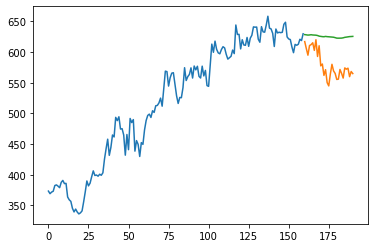

In [41]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])


# ARIMA

In [42]:
from pmdarima.arima import auto_arima

data = df2.sort_index(ascending=True, axis=0)

train = data[:160]
valid = data[160:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=31)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.19 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1323.711, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1282.631, Time=0.42 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.36 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1314.890, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1266.760, Time=1.31 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=4.94 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.80 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1271.702, Time=0.56 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1267.386, Time=1.23 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1266.587, Time=3.04 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1281.843, Time=0.86 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=inf, Time=6.86 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=3.40 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1267.7

In [43]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

60.64044775216333

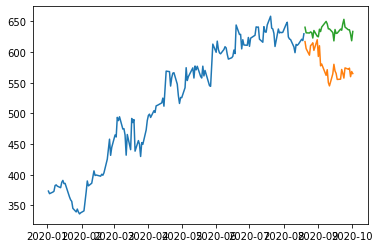

In [44]:
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])


# LSTM

In [45]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df2.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df2)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:160,:]
valid = dataset[160:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

100/100 - 4s - loss: 0.0277


# Accuracy

In [46]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

34.41118892944412

<ipython-input-47-ce92dd3d1196>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


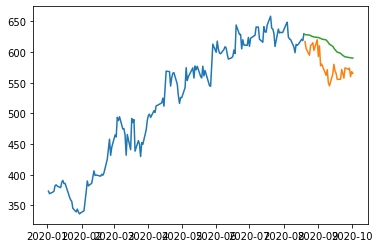

In [47]:
train = new_data[:160]
valid = new_data[160:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])


# Prophet

In [48]:
from fbprophet import Prophet

#creating dataframe
new_data = pd.DataFrame(index=range(0,len(df2)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']

#preparing data
new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

#train and validation
train = new_data[:160]
valid = new_data[160:]

#fit the model
model = Prophet()
model.fit(train)

#predictions
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)


Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [49]:
forecast_valid = forecast['yhat'][160:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

62.33118525427223

<ipython-input-50-db40e2b653e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
<ipython-input-50-db40e2b653e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = forecast_valid.values


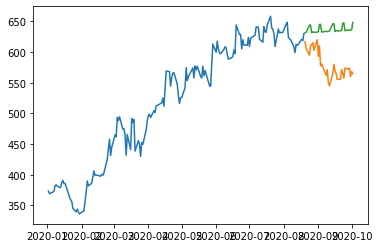

In [50]:
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])


In [43]:
import sys
sys.path


['D:\\Python',
 'C:\\Users\\HP\\anaconda3\\python38.zip',
 'C:\\Users\\HP\\anaconda3\\DLLs',
 'C:\\Users\\HP\\anaconda3\\lib',
 'C:\\Users\\HP\\anaconda3',
 '',
 'C:\\Users\\HP\\anaconda3\\lib\\site-packages',
 'C:\\Users\\HP\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\HP\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\HP\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\HP\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\HP\\.ipython']

In [49]:
from PyInstaller.utils.hooks import collect_submodules, collect_data_files
hiddenimports = collect_submodules('fbprophet')
datas = collect_data_files('fbprophet')


In [51]:
from PyInstaller.utils.hooks import collect_submodules, collect_data_files

hiddenimports = collect_submodules('pystan')
datas = collect_data_files('pystan')


In [54]:
from PyInstaller.utils.hooks import collect_submodules, collect_data_files

hiddenimports = collect_submodules('Cython')
datas = collect_data_files('Cython')